# Machine Intelligence II - Team MensaNord
## Sheet 11

- Nikolai Zaki
- Alexander Moore
- Johannes Rieke
- Georg Hoelger
- Oliver Atanaszov

In [1]:
from __future__ import division, print_function
import matplotlib.pyplot as plt
%matplotlib inline
import scipy.stats
import numpy as np
import math
from scipy.ndimage import imread
import sys

### Exercise 1.0
- Load the data into a vector and normalize it such that the values are between 0 and 1.
- Create two new datasets by adding Gaussian noise with zero mean and standard deviation
σ N ∈ {0.05, 0.1}.

In [2]:
# import image
img_orig = imread('testimg.jpg').flatten()
print("$img_orig")
print("shape: \t\t", img_orig.shape) # = vector
print("values: \t from ", img_orig.min(), " to ", img_orig.max(), "\n")

# "img" holds 3 vectors
img = np.zeros((3,img_orig.shape[0]))
print("$img")
print("shape: \t\t",img.shape)

std = [0, 0.05, 0.1]
for i in range(img.shape[1]):
    # normalize => img[0]
    img[0][i] = img_orig[i] / 255
    # gaussian noise => img[1] img[2]
    img[1][i] = img[0][i] + np.random.normal(0, std[1])
    img[2][i] = img[0][i] + np.random.normal(0, std[2])
    
print(img[:, 0:4])

$img_orig
shape: 		 (177500,)
values: 	 from  0  to  255 

$img
shape: 		 (3, 177500)
[[ 0.63529412  0.63137255  0.62745098  0.63137255]
 [ 0.57158814  0.62380021  0.65026522  0.61015017]
 [ 0.5110397   0.43083444  0.64762485  0.65279348]]


- Create a figure showing the 3 histograms (original & 2 sets of noise corrupted data – use
enough bins!). In an additional figure, show the three corresponding empirical distribution
functions in one plot.

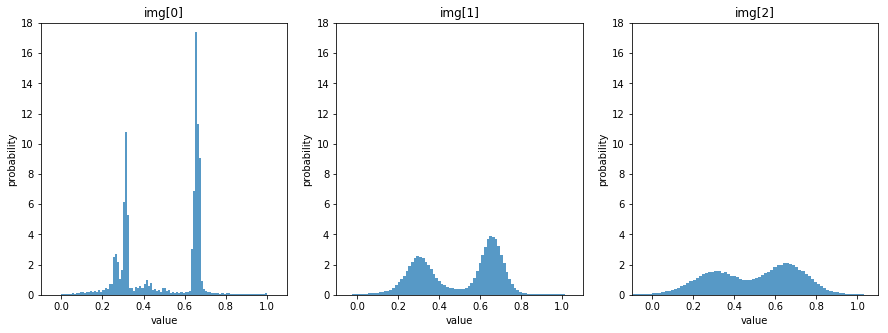

In [3]:
# histograms
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
for i, ax in enumerate(axes.flatten()):
    plt.sca(ax)
    plt.hist(img[i], 100, normed=1, alpha=0.75)
    plt.xlim(-0.1, 1.1)
    plt.ylim(0, 18)
    plt.xlabel("value")
    plt.ylabel("probability")
    plt.title('img[{}]'.format(i))

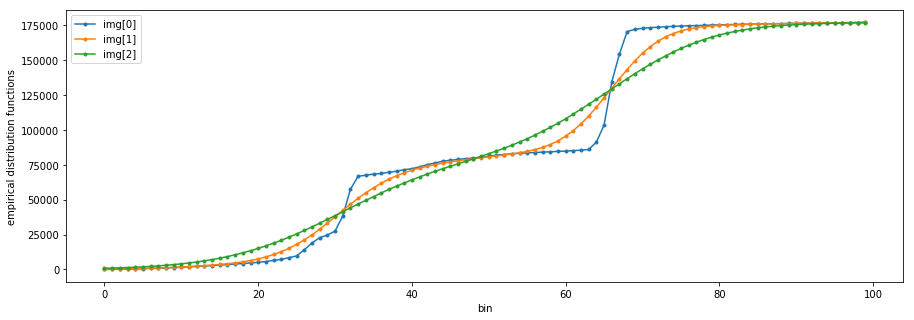

In [4]:
# divide probablity space in 100 bins
nbins = 100
bins = np.linspace(0, 1, nbins+1)

# holds data equivalent to shown histograms (but cutted from 0 to 1)
elementsPerBin = np.zeros((3,nbins))
for i in range(3):
    ind = np.digitize(img[i], bins)
    elementsPerBin[i] = [len(img[i][ind == j]) for j in range(nbins)]
    
# counts number of elements from bin '0' to bin 'j'
sumUptoBinJ = np.asarray([[0 for i in range(nbins)] for i in range(3)])
for i in range(3):
    for j in range(nbins):
        sumUptoBinJ[i][j] = np.sum(elementsPerBin[i][0:j+1])
    
# plot
plt.figure(figsize=(15, 5))
for i in range(3):
    plt.plot(sumUptoBinJ[i], '.-')
plt.legend(['img[0]', 'img[1]', 'img[2]'])
plt.xlabel('bin')
plt.ylabel('empirical distribution functions');

### Exercise 1.1
- Take a subset of P = 100 observations and estimate the probability density p̂ of intensities
with a rectangular kernel (“gliding window”) parametrized by window width h.
- Plot the estimates p̂ resulting for (e.g. 10) different samples of size P 

In [5]:
def H(vec, h):
    """
    (rectangular) histogram kernel function
    """
    vec = np.asarray(vec)
    return np.asarray([1 if abs(x)<.5 else 0 for x in vec])

### $P(\underline{x}) = \frac{1}{h^n} \frac{1}{p} \Sigma_{\alpha=1}^{p} H(\frac{\underline{x} - \underline{x}^{(\alpha)}}{h})$

In [6]:
def P_est(x, h, data, kernel = H):
    """
    returns the probability that data contains values @ (x +- h/2)
    """
    n = 1 #= data.shape[1] #number of dimensions (for multidmensional data)
    p = len(data)
    return 1/(h**n)/p*np.sum(kernel((data - x)/h, h))

In [7]:
# take 10 data sets with 100 observations (indexes 100k to 101k)
# nomenclature: data_3(3, 10, 100) holds 3 times data(10, 100)
P = 100
offset = int(100000)
data_3 = np.zeros((3, 10,P))
for j in range(3):
    for i in range(10):
        data_3[j][i] = img[j][offset+i*P:offset+(i+1)*P]
print(data_3.shape)

(3, 10, 100)


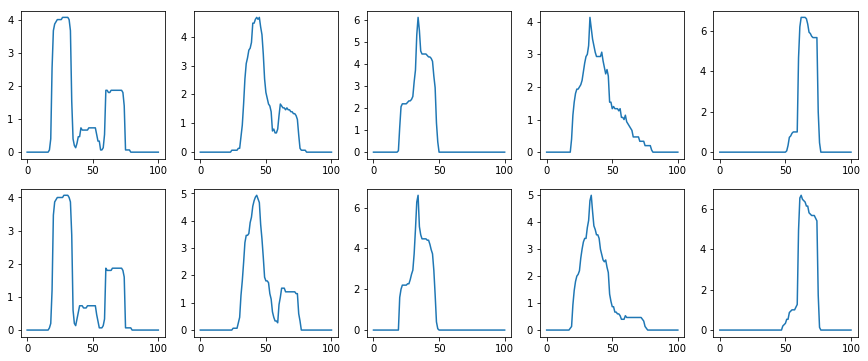

In [8]:
# calculate probability estimation for (center +- h/2) on the 10 data sets
h = .15
nCenters = 101
Centers = np.linspace(0,1,nCenters)

fig, ax = plt.subplots(2,5,figsize=(15,6))
ax = ax.ravel()
for i in range(10):
    ax[i].plot([P_est(center,h,data_3[0][i]) for center in Centers])

- Calculate the negative log-likelihood per datapoint of your estimator using 5000
samples from the data not used for the density estimation (i.e. the “test-set”). Get
the average of the negative log-likelihood over the 10 samples.

### $P(\{\underline{x}^{(\alpha)}\};\underline{w}) = - \Sigma_{\alpha=1}^{p} ln P(\underline{x}^{(\alpha)};\underline{w})$

In [9]:
testdata = img[0][50000:55000]

# calculate average negative log likelihood for 
def avg_NegLL(data, h, kernel=H):
    sys.stdout.write(".")
    average = 0
    for i in range(10):
        L_prob = [np.log(P_est(x,h,data[i],kernel)) for x in testdata]
        negLL = -1*np.sum(L_prob)
#         print(negLL)
        average += negLL
    average /= 10
    return average
# avg_NegLL(data,h,testdata)

2) Repeat this procedure (without plotting) for a sequence of kernel widths h to get the mean
log likelihood (averaged over the different samples) resulting for each value of h.

(a) Apply this procedure to all 3 datasets (original and the two noise-corruped ones) to make
a plot showing the obtained likelihoods (y-axis) vs. kernel width h (x-axis) as one line for
each dataset.

calc data[0]
.

/home/georg/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:8: RuntimeWarning: divide by zero encountered in log


...................
calc data[1]
....................
calc data[2]
....................


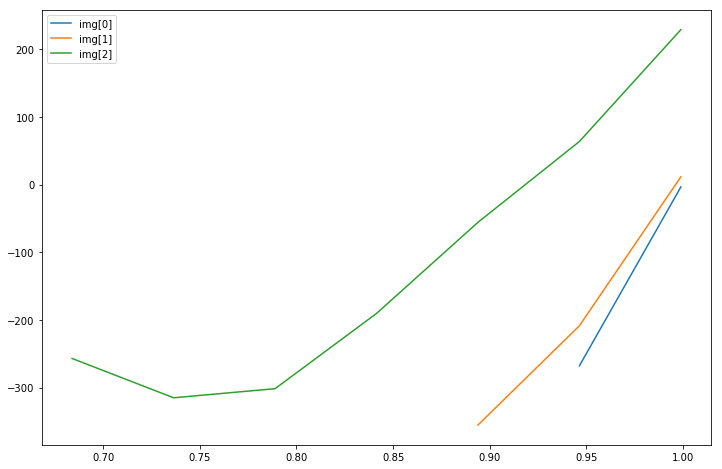

In [18]:
hs = np.linspace(0.001, 0.999, 20)

def plot_negLL(data_3=data_3, kernel=H):
    fig = plt.figure(figsize=(12,8))
    for j in range(3):
        print("calc data[{}]".format(j))
        LLs = [avg_NegLL(data_3[j],h,kernel=kernel) for h in hs]
        plt.plot(hs,LLs)
        print()
    plt.legend(['img[0]', 'img[1]', 'img[2]'])
    plt.show()

plot_negLL()

not plotted points have value = inf because:

$negLL = - log( \Pi_\alpha P(x^\alpha,w) )$

so if one single $P(x^\alpha,w) = 0$ occurs (x has 5000 elements)

the result is -log(0)=inf (not defined)

this only occurs with the histogram kernel.

(b) Repeat the previous step (LL & plot) for samples of size P = 500.

calc data[0]
.

/home/georg/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:8: RuntimeWarning: divide by zero encountered in log


...................
calc data[1]
....................
calc data[2]
....................


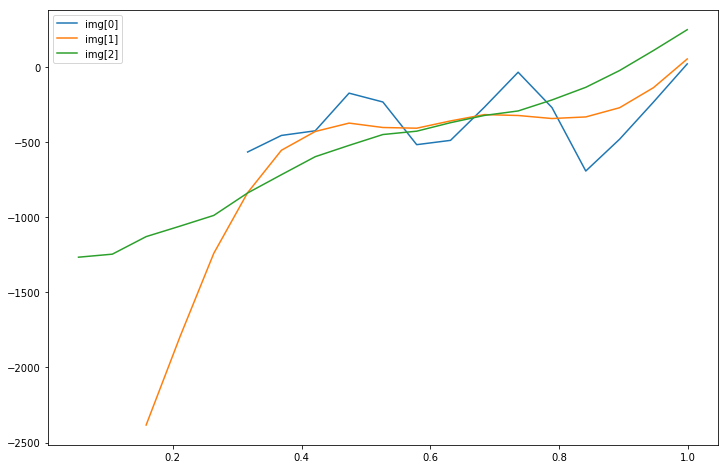

In [17]:
P = 500
data_3b = np.zeros((3, 10,P))
for j in range(3):
    for i in range(10):
        data_3b[j][i] = img[j][offset+i*P:offset+(i+1)*P]
        
plot_negLL(data_3=data_3b)

(c) Repeat the previous steps (a & b) for the Gaussian kernel with σ^2 = h.

In [12]:
def Gaussian(x,h):
    """
    gaussian kernel function
    """

    return np.exp(-x**2/h/2)/np.sqrt(2*np.pi*h)

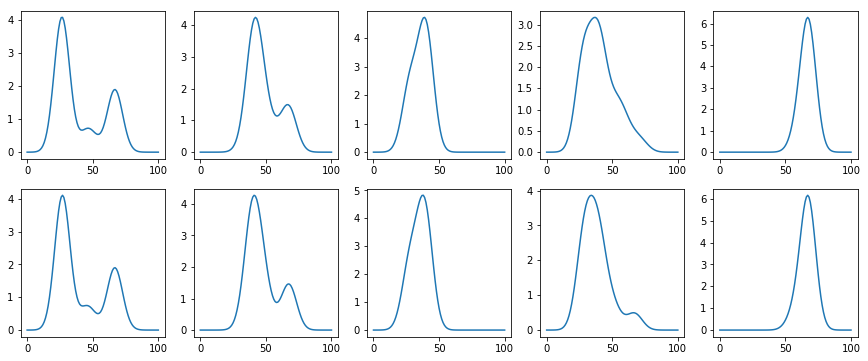

In [13]:
fig, ax = plt.subplots(2,5,figsize=(15,6))
h = .15

ax = ax.ravel()
for i in range(10):
    ax[i].plot([P_est(center,h,data_3[0][i],kernel=Gaussian) for center in Centers])

calc data[0]
.

/home/georg/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:8: RuntimeWarning: divide by zero encountered in log


...................
calc data[1]
....................
calc data[2]
....................


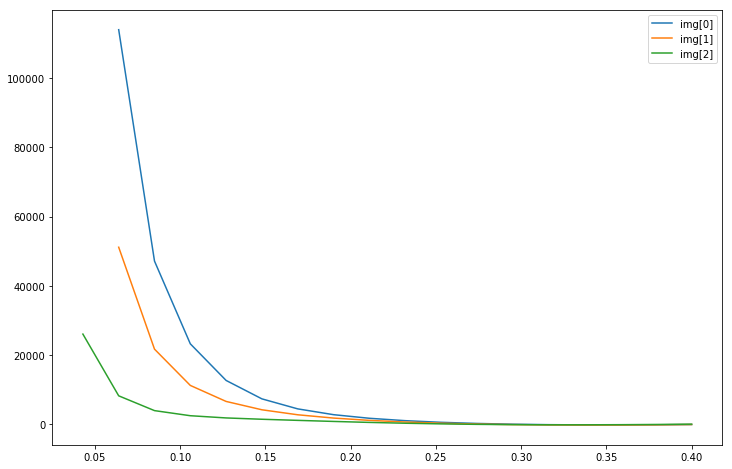

In [21]:
hs = np.linspace(0.001, 0.4, 20)
plot_negLL(kernel=Gaussian)

calc data[0]
.

/home/georg/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:8: RuntimeWarning: divide by zero encountered in log


...................
calc data[1]
....................
calc data[2]
....................


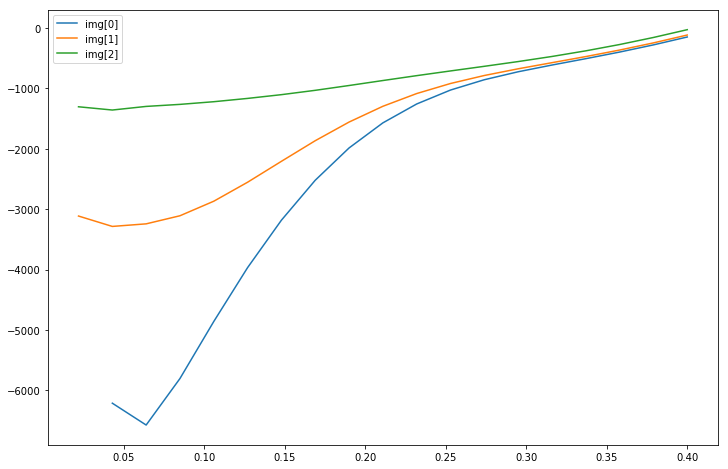

In [22]:
plot_negLL(data_3=data_3b, kernel=Gaussian)